
## USD vs EUR

In [110]:
%matplotlib inline

from datetime import datetime, timedelta
from pandas.io.data import DataReader
from pandas.io.parsers import read_csv
import matplotlib.pyplot as plt
import requests

FIN_SERVICE_PROVIDER = 'yahoo'
PAST_DAYS = 60

# SYMBOL = ['IBM', 'AAPL']
SYMBOL = ['USD', 'EUR']

# today
t1 = datetime.now()
# two months later
t2 = t1 - timedelta(days=PAST_DAYS)

df1  = DataReader(SYMBOL[0],  FIN_SERVICE_PROVIDER , t2, t1)
df2  = DataReader(SYMBOL[1],  FIN_SERVICE_PROVIDER , t2, t1)

In [111]:
df1.tail()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2015-04-23,90.25,91.84,89.95,91.50,1600,91.50
2015-04-24,91.56,91.56,87.23,88.20,8200,88.20
2015-04-27,88.14,90.43,88.08,88.08,4000,88.08
2015-04-28,87.48,89.28,87.00,88.76,2800,88.76
2015-04-29,87.68,89.00,86.93,88.26,3500,88.26


### USD

### EUR

In [112]:
df2.tail()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2015-04-23,36.89,37.05,36.61,36.80,302800,35.99
2015-04-24,36.80,37.14,36.50,36.64,332200,35.83
2015-04-27,36.53,36.95,36.53,36.80,210000,35.99
2015-04-28,36.80,36.80,36.20,36.44,612700,35.63
2015-04-29,36.59,36.85,35.55,35.73,545300,34.94


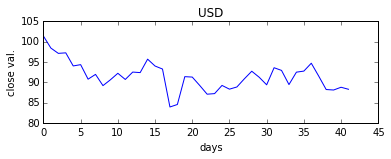

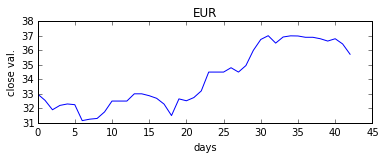

In [113]:
plt.figure(1)
plt.subplot(211)
plt.title(SYMBOL[0])
plt.xlabel('days')
plt.ylabel('close val.')
plt.plot(df1['Close'])

plt.figure(2)
plt.subplot(211)
plt.title(SYMBOL[1])
plt.xlabel('days')
plt.ylabel('close val.')
plt.plot(df2['Close'])

## Bitcoin History vs EUR

In [137]:
# BIT_COIN_CSV_URL = 'http://www.quandl.com/api/v1/datasets/BCHARTS/BITSTAMPUSD.csv'
BIT_COIN_CSV_URL = 'http://www.quandl.com/api/v1/datasets/BCHARTS/KRAKENEUR.csv'

bcdf = read_csv(BIT_COIN_CSV_URL)
bcdf = bcdf[bcdf['Date']> t2.strftime("%Y-%m-%d")]
bcdf = bcdf.iloc[::-1]


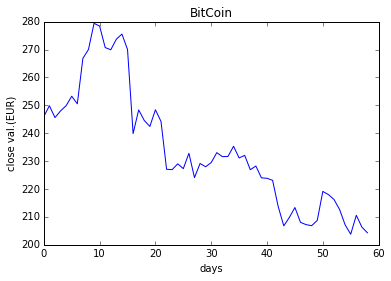

In [115]:
plt.title("BitCoin")
plt.xlabel('days')
plt.ylabel('close val.(EUR)')
plt.plot(bcdf['Close'])

### Close Price Statistics

#### Mean (in 60 Days)

In [116]:
bcdf['Close'].mean()

234.11443474576271

#### Variance (in 60 days)

In [117]:
bcdf['Close'].var()

461.60200560864479

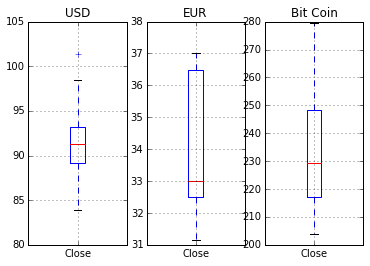

In [118]:
fig = plt.figure()
ax1 = fig.add_subplot(1,3,1)
ax1.set_title(SYMBOL[0])
# ax1.title(SYMBOL[0])
ax1 = df1.boxplot(column='Close', return_type='axes')


ax2 = fig.add_subplot(1,3,2)
# ax2.plt.title(SYMBOL[1])
ax2.set_title(SYMBOL[1])
ax2 = df2.boxplot(column='Close', return_type='axes')

ax3 = fig.add_subplot(1,3,3)
# ax3.plt.title(SYMBOL[1])
ax3.set_title('Bit Coin')
ax3 = bcdf.boxplot(column='Close', return_type='axes')



### Gains

In [119]:
REAL_TIME_VALE_API = 'http://api.coindesk.com/v1/bpi/currentprice.json'
# REAL_TIME_VALE_API = "http://btc.blockr.io/api/v1/coin/info"
r = requests.get(REAL_TIME_VALE_API)
cur_value = 1
if r.status_code == 200:
    _j = r.json()['bpi']['EUR']
    cur_value = float(_j['rate'])
    print("Real time value {} {}".format(_j['rate'], _j['symbol']))

Real time value 208.4385 &euro;


Price per coin: €208.87

In [120]:
price_x_coin = 208.87
gain= float(cur_value) - float(price_x_coin)
print("Gain {}".format(gain))

Gain -0.4315


### Predict


### Errors evaluation

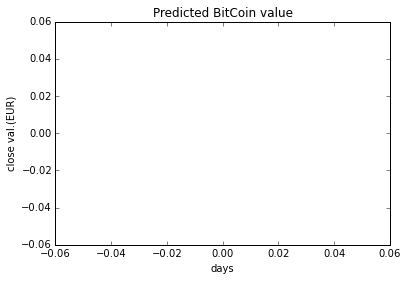

In [151]:
X = [ [x] for x in bcdf.index]
y = bcdf['Close']


from sklearn.neighbors import KNeighborsRegressor
neigh = KNeighborsRegressor(n_neighbors=5)
neigh.fit(X[::-1], list(y.values[::-1]))

Y = [list(neigh.predict([[i]]))[0] for i in range(len(X), 0)]

plt.title("Predicted BitCoin value")
plt.xlabel('days')
plt.ylabel('close val.(EUR)')
plt.plot(Y)

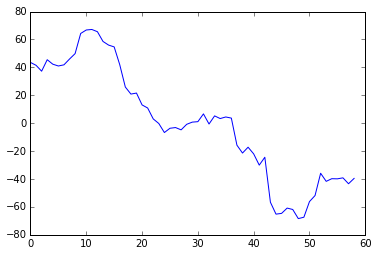

In [145]:
errors = [ Yi-yi for Yi, yi in zip(Y[::-1], y[::-1])]

plt.plot(errors)

In [146]:
import numpy as np

print("Error mean: {} ".format(np.mean(errors)))

Error mean: 0.0306733559322 


### Tomorrow's prediction

In [148]:
print("Tomorrow's predicted closing value {}".format(neigh.predict([[-1]])))

Tomorrow's predicted closing value [ 206.42983]


In [150]:
print("Current error {}".format())

IndexError: tuple index out of range